## 1. 검증셋 모델 평가

### 1-1. 데이터 불러오기

In [1]:
import pandas as pd

file_path = '../data/08_wine.csv'
wine = pd.read_csv(file_path)
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [3]:
# 독립변수, 종속변수 데이터 추출
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

print(data.shape, target.shape)

(6497, 3) (6497,)


### 1-2. 데이터 분리하기 ( 훈련/테스트/<b>검증</b> 세트로 나누기)

In [4]:
## 훈련 데이터 : 검증데이터 : 테스트데이터로 나누기
# - 보통 6:2:2로 나눈다. (가장 많이 사용하는 방식)
from sklearn.model_selection import train_test_split

In [6]:
## 1. 우선 훈련데이터와 테스트데이터를 8:2로 쪼갠다
train_data, test_data, train_target, test_target = train_test_split(
        data, target, test_size=0.2, random_state = 42)

print(train_data.shape, train_target.shape)
print(test_data.shape, test_target.shape)

(5197, 3) (5197,)
(1300, 3) (1300,)


In [7]:
## 2. 훈련데이터를 이용해서 검증데이터 만들기(8:2)
sub_data, val_data, sub_target, val_target = train_test_split(
        train_data, train_target, test_size=0.2, random_state = 42)

print(sub_data.shape, sub_target.shape)
print(val_data.shape, val_target.shape)

(4157, 3) (4157,)
(1040, 3) (1040,)


### 1-3. 검증셋으로 모델 평가하기

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_data, sub_target)

print(dt.score(sub_data,sub_target))
print(dt.score(val_data,val_target))

0.9971133028626413
0.864423076923077


In [9]:
print(dt.score(test_data, test_target))

0.8569230769230769


## 2. 교차검증(Cross Validation)

In [ ]:
## 훈련데이터와 검증데이터를 구분할 필요없이 내부적으로 구분해서 사용
# - 내부적으로 구분에 사용하는 데이터는 훈련(train)데이터
# - 데이터 준비는 기존처럼 훈련과 테스트데이터만 준비
# - 검증데이터는 별도로 준비하지 않아도 됨

In [ ]:
## 교차검증에 사용되는 주요 키워드
# 3-폴드(fold) 교차검증
#  : 훈련데이터를 세부분으로 나누고 데이터를 나눈뒤 수행
#  : 구간마다 훈련데이터를 검증데이터로 바꿔가면서 수행
#  : k-폴드 교차검증 또는 k-겹 교차검증이라고 함

# 보통 5-폴드 교차검증 또는 10-폴드 교차검증 사용
#  : 훈련데이터로 80% 이상을 모두 모델 훈련에 사용 가능

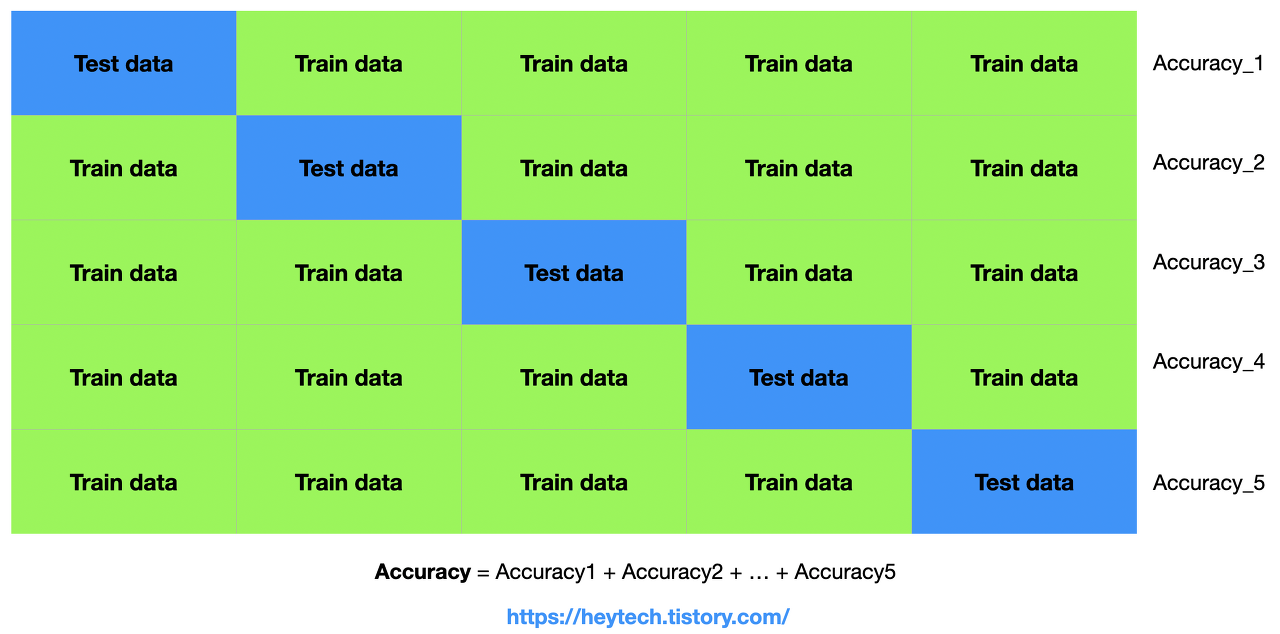

In [10]:
## 사용하는 데이터는 다시 한번 확인
print(train_data.shape, train_target.shape)
print(test_data.shape, test_target.shape)

(5197, 3) (5197,)
(1300, 3) (1300,)


In [18]:
## 교차검증 모듈 : cross_validate
from sklearn.model_selection import cross_validate

# dt : 위에서 평가한 훈련모델(결정트리, 사용한 모델 지정하면 됨)
# 두번째값 : 훈련데이터(fold에서 훈련데이터 나눌때 사용)
# 세번째값 : 검증데이터(fold에서 검증데이터 나눌때 사용)
scores = cross_validate(dt, train_data, train_target)
print(scores)

# 기본적으로 5-폴드 교차 검증을 수행
# test_score : 교차 검증의 각 최종 점수 (위 사진의 Accuracy_n)
# 딕셔너리의 test_score 평균값이 최종 훈련모델의 평가점수(정확도)
print('\n', '최종 score = ', scores['test_score'].mean())

{'fit_time': array([0.01479363, 0.01441908, 0.01396537, 0.01297784, 0.01198053]), 'score_time': array([0.00201607, 0.00099802, 0.0009985 , 0.0010159 , 0.00198078]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

 최종 score =  0.855300214703487


In [21]:
## 훈련데이터를 섞거나, 폴드의 갯수를 지정할 수 있는 클래스
# - StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# 교차검증 함수 그대로 사용
# cv : 분할기 속성
#    : 분할기로 StratifiedKFold 클래프 사용
#    : 속성값이 없을 경우 기본 fold는 5, 기본이며 섞지는 않음
scores = cross_validate(dt, train_data, train_target, cv = StratifiedKFold())
print(scores)

print('\n', '최종 score = ', scores['test_score'].mean())

{'fit_time': array([0.00697923, 0.00897527, 0.00797987, 0.00695205, 0.00897527]), 'score_time': array([0.00099707, 0.        , 0.00104737, 0.0009768 , 0.        ]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

 최종 score =  0.855300214703487


In [25]:
from sklearn.model_selection import StratifiedKFold

# n_splits : fold 갯수
# shuffle = True : 섞기
splitter = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
scores = cross_validate(dt, train_data, train_target, cv = splitter)
print(scores)

print('\n', '최종 score = ', scores['test_score'].mean())

{'fit_time': array([0.00797915, 0.00797868, 0.00692225, 0.00797868, 0.00698042,
       0.01607227, 0.0160017 , 0.01496005, 0.01504397, 0.01446772,
       0.01495552, 0.0149591 , 0.01596832, 0.01499867, 0.01496172,
       0.01558137, 0.01594663, 0.01498842, 0.01497269, 0.0147481 ]), 'score_time': array([0.00000000e+00, 5.72204590e-05, 9.98020172e-04, 9.96112823e-04,
       0.00000000e+00, 8.84056091e-04, 9.56773758e-04, 1.00207329e-03,
       9.11712646e-04, 4.94003296e-04, 9.98020172e-04, 9.98497009e-04,
       9.96351242e-04, 9.50574875e-04, 9.97304916e-04, 1.03020668e-03,
       0.00000000e+00, 9.53674316e-04, 1.02496147e-03, 9.97304916e-04]), 'test_score': array([0.85384615, 0.85384615, 0.88461538, 0.86923077, 0.84230769,
       0.86538462, 0.87307692, 0.85384615, 0.83461538, 0.84615385,
       0.87307692, 0.86923077, 0.85      , 0.86538462, 0.86153846,
       0.86538462, 0.84615385, 0.83783784, 0.8996139 , 0.86100386])}

 최종 score =  0.8603073953073954


## 3. 하이퍼파라미터 튜닝(AutoML)

In [ ]:
##  AutoML : 교차검증, 하이퍼파라미터 찾기, 모델 훈련 한번에 자동으로 수행
# - 사용 패키지 : sklearn.model_selection
# - 사용클래스 : (그리드서치) GridSearchCV  : 스스로 교차검증 진행

## 하이퍼파라미터 튜닝 - 그리드서치
- 결정트리의 max_depth(트리의 깊이) 값 찾기
- 그리드서치 객체(모델) 사용

In [29]:
from sklearn.model_selection import GridSearchCV

# 찾을 하이퍼파라미터는 딕져너리로
# 실제 파라미터 변수이름 그대로, 찾을 범위 지정
params = {'max_depth' : range(5,20)}

# 객체(모델) 생성
# - 첫번째 값 : 훈련모델
# - 두번째 값 : 찾을 하이퍼파라미터 값(딕셔너리로 정의)
# - 세번째 값 : CPU 코어 갯수(-1은 모든 코어 사용, 병렬처리)
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  params, n_jobs = -1)

gs.fit(train_data, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20)})

In [30]:
# 그리드서치 결과
#  - 하이퍼파라미터의 찾은 값을 알려줌
#  - ** 훈련모델이 생성되어 반환됨
print(gs.best_estimator_)

DecisionTreeClassifier(max_depth=8, random_state=42)


In [32]:
## 그리드서치를 통해 생성된 훈련모델을 평가하기
dt = gs.best_estimator_
print(dt.score(train_data, train_target))

0.9003271117952665


In [34]:
# 찾으려고 했던 적합한 트리의 깊이를 확인할 수 있음
print(gs.best_params_)

{'max_depth': 8}


In [36]:
# 찾아낸 모든값 출력
print(gs.cv_results_)

{'mean_fit_time': array([0.00580974, 0.00854793, 0.01039948, 0.00857267, 0.00940681,
       0.00885906, 0.00779953, 0.00868673, 0.00778031, 0.00991025,
       0.00777888, 0.00757966, 0.00817819, 0.00837722, 0.00718551]), 'std_fit_time': array([0.00021312, 0.0023363 , 0.00182708, 0.00122284, 0.00323029,
       0.00111712, 0.00075314, 0.00125006, 0.00031907, 0.0045326 ,
       0.00039911, 0.00048869, 0.00101048, 0.00101711, 0.00074519]), 'mean_score_time': array([0.00098   , 0.00123177, 0.00138054, 0.00119653, 0.00074329,
       0.00077853, 0.00072298, 0.00096402, 0.00042987, 0.00059586,
       0.00039887, 0.00079789, 0.00111542, 0.00079799, 0.00059357]), 'std_score_time': array([5.49997208e-04, 4.70052411e-04, 4.69585800e-04, 3.99279947e-04,
       3.86334590e-04, 3.91046696e-04, 3.89385837e-04, 6.63291628e-05,
       4.59714498e-04, 4.86534957e-04, 4.88519238e-04, 3.98946304e-04,
       2.36582822e-04, 3.98993588e-04, 4.84727537e-04]), 'param_max_depth': masked_array(data=[5, 6, 7, 8, 

In [39]:
# 딕셔너리의 key값만 조회
print(gs.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [42]:
# params 값 확인
print(gs.cv_results_['params'])

[{'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}, {'max_depth': 9}, {'max_depth': 10}, {'max_depth': 11}, {'max_depth': 12}, {'max_depth': 13}, {'max_depth': 14}, {'max_depth': 15}, {'max_depth': 16}, {'max_depth': 17}, {'max_depth': 18}, {'max_depth': 19}]


In [44]:
# 1폴드 조회
print(gs.cv_results_['split0_test_score'])

[0.84711538 0.84807692 0.85769231 0.85288462 0.85769231 0.84519231
 0.85865385 0.86730769 0.86538462 0.86826923 0.86730769 0.86442308
 0.86346154 0.86634615 0.87211538]


##### 표 작성

In [68]:
col = []
for i in gs.cv_results_['params'] : 
    a = print(gs.cv_results_['params'][i])
    col.append(a)
    
col

TypeError: list indices must be integers or slices, not dict

In [60]:
df = pd.DataFrame(gs.cv_results_['split0_test_score'])
df

,0
0,0.847115
1,0.848077
2,0.857692
3,0.852885
4,0.857692
5,0.845192
6,0.858654
7,0.867308
8,0.865385
9,0.868269


### 3-2. 훈련모델 최종검증

In [45]:
### 훈련모델 최종 검증
# 최종 검증은 테스트데이터만 사용
print(dt.score(test_data, test_target))

0.8584615384615385


### 3-3. 찾을 하이퍼파라미터 여러개 사용

In [67]:
# min_impurity_decrease : 결정트리 노드 분리시 불순도 감소 최소량
# max_depth : 결정트리 깊이
# min_samples_split : 결정트리 노드를 나누기 위한 최소 샘플 개수
import numpy as np 

params = {'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.0001),
          'max_depth' : range(5,20),
          'min_samples_split' : range(2, 100, 10)}

## 그리드서치 훈련
# 찾을 파라미터의 범위별로 교차검증 진행
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs = -1)
gs.fit(train_data, train_target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [69]:
gs.best_estimator_

# 아까는 최적화 깊이 8나왔음, 3개의 파라미터가 동시에 최적화되는 값을 찾음

DecisionTreeClassifier(max_depth=14, min_impurity_decrease=0.0004,
                       min_samples_split=12, random_state=42)

In [70]:
dt2 = gs.best_estimator_
print(dt2.score(train_data, train_target))

### 훈련모델 최종 검증
print(dt2.score(test_data, test_target))

0.892053107562055
0.8615384615384616


In [ ]:
'''
전체 정확도는 조금 내려갔지만 과대적합이 줄었으며,
최종 테스트정확도가 증가하였다. 더 좋은 모델이 만들어짐
'''

In [73]:
# 10/7 - 폴드 지정
splitter = StratifiedKFold(n_splits=7, shuffle=True, random_state=42)

params = {'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.0001),
          'max_depth' : range(5,20),
          'min_samples_split' : range(2, 100, 10)}

## 그리드서치 훈련
# 찾을 파라미터의 범위별로 교차검증 진행
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                  params, n_jobs = -1, cv=splitter)
gs.fit(train_data, train_target)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 20),
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10)})

In [74]:
dt3 = gs.best_estimator_
print(dt3.score(train_data, train_target))

print(dt3.score(test_data, test_target))

0.9230325187608236
0.8692307692307693


## 하이퍼파라미터 튜닝 - 랜덤서치(Random Search)

In [75]:
## 랜덤서치 사용시 아래 조건 만족해야 함
# - 하이퍼파라미터 값이 수치인 것들만 사용
# - 범위나 간격을 미리 정하기 어려울 경우
# - 너무 많은 매개변수가 있어서 그리드서치 수행시간이 오래 걸리는 경우
# - 매개변수를 샘플링할때 확률분포객체를 전달

## 사용 모듈 : uniform(실수값), randint(정수값)
from scipy.stats import uniform, randint

In [81]:
# 정수값 범위 설정
rgen = randint(0,10)

# 범위 내에서 임의값 출력(확률적으로 고르게 뽑아냄)
print(rgen.rvs(100))

[7 6 8 7 2 1 2 9 4 8 1 1 6 7 0 8 0 8 0 1 5 4 5 1 5 3 0 1 4 8 0 3 2 3 4 7 9
 0 8 3 4 9 1 4 6 5 9 7 8 8 7 9 2 7 7 8 1 6 4 9 3 7 6 3 9 3 5 2 1 9 7 4 8 1
 6 7 1 3 2 7 2 6 1 9 0 9 6 9 8 9 9 2 9 5 9 2 1 4 4 9]


In [79]:
# 실수값 범위설정
ugen = uniform(0,1)

# 임의값 50개 조회
print(ugen.rvs(50))

[0.68765085 0.96743187 0.69931876 0.59704094 0.12742346 0.55076136
 0.28771663 0.18944199 0.06526495 0.82925333 0.29489073 0.48594319
 0.69085858 0.44645437 0.35908641 0.39439943 0.93736591 0.14468725
 0.11067063 0.87182701 0.34781659 0.23520046 0.2158     0.08372106
 0.65403416 0.57160162 0.00970069 0.98776083 0.28842784 0.37803042
 0.58938567 0.30856681 0.38665497 0.76727591 0.33435818 0.38115366
 0.65905158 0.17280867 0.73269263 0.20974085 0.09374189 0.0695169
 0.58653672 0.32552869 0.30007082 0.31815027 0.43025938 0.07831508
 0.50613787 0.56192535]


In [82]:
## 하이퍼파라미터 찾을 매개변수 정의
params = {'min_impurity_decrease' : uniform(0.0001, 0.001),
          'max_depth' : randint(20,50),
          'min_samples_split' : randint(2,25)}

## 랜덤서치 클래스(모델) : RandomizedSearchCV()
from sklearn.model_selection import RandomizedSearchCV

# 결정토리 모델 사용, 훈련반복 횟수 100회, 코어전체, 시드 42
rs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),
                        params, n_iter=100, n_jobs = -1, random_state=42)
rs.fit(train_data, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E61C274100>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E61C363C10>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E61C05A430>},
                   random_state=42)

In [83]:
rs.best_params_

{'max_depth': 29,
 'min_impurity_decrease': 0.000437615171403628,
 'min_samples_split': 16}

In [87]:
rs.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_impurity_decrease', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [89]:
# 훈련 100회 중 가장 큰 값의 최종 평가 점수(최대값 찾기)
rs.cv_results_['mean_test_score'].max()
# np.max(rs.cv_results_['mean_test_score'])

0.8695409787517583

In [92]:
# 훈련모델 최종 검증
dt = rs.best_estimator_

dt.score(test_data, test_target)

0.8623076923076923